# Introduction to the LungCapData Dataset
The LungCapData dataset is a comprehensive collection of data related to lung capacities in individuals. It is designed to provide valuable insights into respiratory health, aiding in medical research, health assessments, and educational purposes.

## Aim
The primary aim of the LungCapData dataset is to facilitate the understanding and analysis of factors affecting lung capacity in different population groups. By providing detailed measurements and demographic information, the dataset aims to:

### Dataset Description
- The dataset includes various measurements related to lung capacity, demographic information, and health-related attributes.
- Common attributes in such datasets might include

- **Age**: The age of the individual.
- **Gender**: The gender of the individual.
- **Height**: The height of the individual (inches).
- **Weight**: The weight of the individual (kilograms).
- **Lung Capacity**: Measurement of lung capacity (often in liters).


**Data Source**: The data was collected from Kaggle, a platform known for hosting datasets relevant to various domains.

***importing required libraries***

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

**1 Load the Data:**

- Load the "LungCapData" dataset into a Pandas DataFrame.


In [2]:
df = pd.read_csv("LungCapData.csv")

- head() method used to display the first five rows

In [3]:
df.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


- shape attribute return the number of rows & columns

In [4]:
df.shape

(725, 6)

- info() method provide concise summary of data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LungCap    725 non-null    float64
 1   Age        725 non-null    int64  
 2   Height     725 non-null    float64
 3   Smoke      725 non-null    object 
 4   Gender     725 non-null    object 
 5   Caesarean  725 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 34.1+ KB


### 2 Data Cleaning

- isnull() mehtod is used to detect missing or null values
- sum() method is used to sum up value
- sort_values() method is used to sort value in ascending or descending order


In [6]:
# check the null  values
df.isnull().sum().sort_values() # there is no null value

LungCap      0
Age          0
Height       0
Smoke        0
Gender       0
Caesarean    0
dtype: int64

- The value_counts function  is used to count the occurrences of each unique value in a Series.

In [7]:
#df.Caesarean.value_counts()
#df.Smoke.value_counts()
df.Gender.value_counts()

Gender
male      367
female    358
Name: count, dtype: int64

-  The replace function  is used to replace specified values in a DataFrame or Series with new values.
Using replace, we can convert object data into integers by specifying replacements in a DataFrame or Series.

In [8]:
df.Smoke = df.Smoke.replace({"no":0,"yes":1})
df.Gender = df.Gender.replace({"male":1,"female":0})
df.Caesarean = df.Caesarean.replace({"yes":1,"no":0})

C:\Users\PRATIK KOLHE\AppData\Local\Temp\ipykernel_11464\4013284571.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.Smoke = df.Smoke.replace({"no":0,"yes":1})
C:\Users\PRATIK KOLHE\AppData\Local\Temp\ipykernel_11464\4013284571.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.Gender = df.Gender.replace({"male":1,"female":0})
C:\Users\PRATIK KOLHE\AppData\Local\Temp\ipykernel_11464\4013284571.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old b

## 3 Data Splitting

- The train_test_split function from sklearn.model_selection is used to split a dataset into training and testing sets

In [9]:
from sklearn.model_selection import train_test_split

- splits the dataset df into training and testing sets, with 25% of the data allocated for testing.

In [10]:
df_train, df_test = train_test_split(df , test_size=0.25)

- These lines separate the feature columns (df_train_x, df_test_x) from the target column (df_train_y, df_test_y) in both the training and testing datasets.


In [11]:
df_train_x = df_train.iloc[:, 1::]
df_train_y = df_train.iloc[:, 0]

df_test_x = df_test.iloc[:, 1::]
df_test_y = df_test.iloc[:, 0]

In [74]:
df_train_x.shape

((543, 5), (182, 5))

In [13]:
df_train_y.shape

(543,)

In [14]:
# Model building
#1. Import thr neccessary function from sklearn
#2 Create an object of that function
#3 Run the fit function and model is created
#4 Run the pedict function(prediction is done)

## 4 Model Selection:

- The LinearRegression class from sklearn.linear_model is used to build and train a model that predicts a target value based on input featur

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
linereg_df = LinearRegression()

- The linereg_df.fit(df_train_x, df_train_y) command teaches the linear regression model to predict the target values using the training data.

In [17]:
linereg_df.fit(df_train_x, df_train_y)

LinearRegression()

- This clarifies that df_test holds predictions made on the test dataset, while df_train holds predictions made on the train dataset using the linereg_df model.

In [37]:
pred_test = linereg_df.predict(df_test_x)
pred_train = linereg_df.predict(df_train_x)

## 5 Model evaluation - Check the performance of our model

- Rsquare represents the R-squared score calculated on the training data 

In [38]:
Rsquare = linereg_df.score(df_train_x, df_train_y)
Rsquare

0.8510393656493904

In [39]:
df_train_x.shape

(543, 5)

---- Rsquare

In [40]:
N = df_train_x.shape[0] # Number of samples in the training set
K = df_train_x.shape[1]  # Number of features in the training set

- Rsquare represents the R-squared score calculated on the training data 
- R-squared is a statistical measure that ranges from 0 to 1.
- Higher R-squared: A value closer to 1 indicating a good fit of your model to the data.
- Lower R-squared: A value closer to 0 indicate that your model does not adequately explain the variability in the data.

In [48]:
Adj_Rsquare = 1 - (1-Rsquare) * (N-1) / (N-K-1)
Adj_Rsquare

0.8496523951247106

- Each element in linereg_df.coef_ corresponds to the coefficient of the respective feature in your model.

In [53]:
#coefficients
linereg_df.coef_

array([ 0.16214999,  0.26401553, -0.53268863,  0.35063346, -0.26353655])

- the intercept (intercept_) represents the value of the dependent variable (target) when all independent variables (features) are zero. 

In [54]:
#intercept
linereg_df.intercept_  # formula   Y−(coef_1×X1+coef_2×X2+...+coef_n×Xn)

-11.309198727019158

In [55]:
# finding MSE, RMSE, MAPE
err_train = df_train_y - pred_train
err_test = df_test_y - pred_test


-  Mean Squared Error (MSE) measures the average squared difference between predicted and actual values.


In [62]:
#Mean Squared Error
mse = np.mean(np.square(err_test))
mse

0.9563921637252222

- RMSE (Root Mean Squared Error) is the square root of the average squared difference between predicted and actual values.


In [61]:
#Root Mean Squared Error
rmse = np.sqrt(mse)
rmse

0.9779530478122261

-  MAPE (Mean Absolute Percentage Error) measures the average absolute percentage difference between predicted and actual values.


In [58]:
mape = np.mean(np.abs(err_test * 100 / df_test_y))
mape

12.474532540647033

- used to calculate the accuracy of regression model. that shown the d/w predicted value and actual value
- lower mae value indicate better model performance

In [63]:
# Mean Absolute Error
mae = np.mean(np.abs(err_test))
mae

0.7888917724078404

C:\Users\PRATIK KOLHE\AppData\Local\Temp\ipykernel_11464\1908719926.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(err_train)
C:\Users\PRATIK KOLHE\anaconda3\envs\pythangama\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='LungCap', ylabel='Density'>

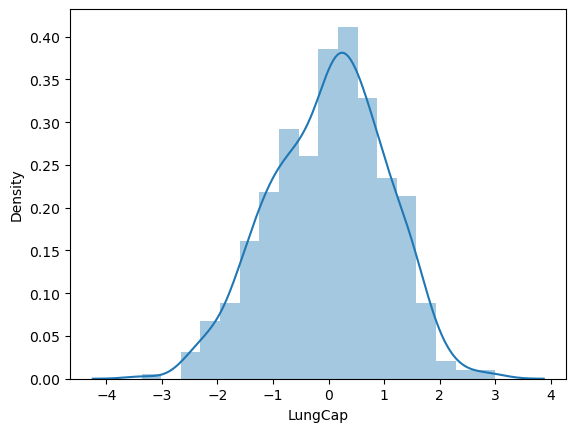

In [81]:
import seaborn as sns
sns.distplot(err_train)


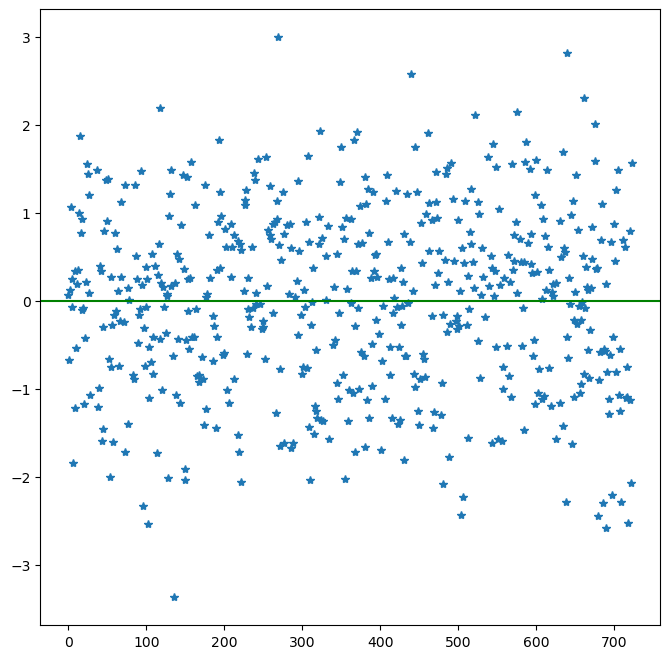

In [85]:
#scatter plot of error
plt.figure(figsize=(8,8))
plt.plot(err_train,"*")
plt.axhline(y = np.mean(err_train),color="green")



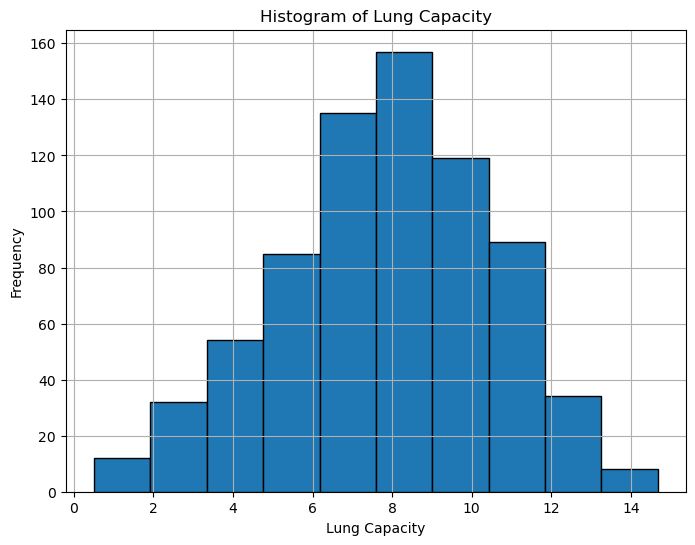

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['LungCap'], bins=10, edgecolor='black')
plt.title('Histogram of Lung Capacity')
plt.xlabel('Lung Capacity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [92]:
pred_actual = pd.DataFrame({"Predicted":pred_train,"Actual":df_train_y})
pred_actual.head(10)

,Predicted,Actual
590,8.495273,9.150
569,11.818322,13.375
293,11.169243,11.400
373,11.720003,10.725
471,11.497284,12.625
347,5.157455,5.025
558,11.572816,10.575
658,6.717971,6.500
300,9.030347,8.200
516,7.631720,8.275


C:\Users\PRATIK KOLHE\anaconda3\envs\pythangama\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PRATIK KOLHE\anaconda3\envs\pythangama\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x1000 with 0 Axes>

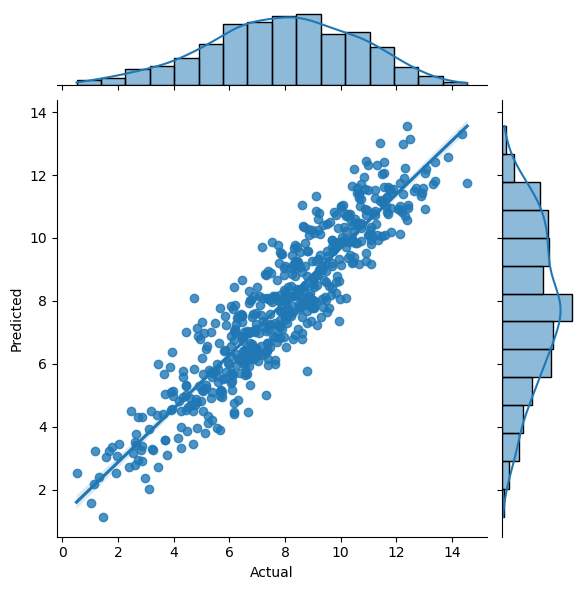

In [93]:
plt.figure(figsize=(10,10))
sns.jointplot(x="Actual",y="Predicted",kind="reg",data=pred_actual)
